<a href="https://colab.research.google.com/github/theonogo/Credit-Card-Fraud-Prediction/blob/main/CardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraudulanting

In [28]:
#drive.mount("/content/drive", force_remount=True)

In [29]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

import os

os.chdir("/content/drive/MyDrive/Caurd_Faurd")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'CA683 Assignment_Albert-Paul-Rohan-Theo.mp4'
'CA683 Assignment_Albert-Paul-Rohan-Theo.pdf'
 CardFraud.ipynb
'credip carp.gslides'
'data mining project (1).pptx'
'data mining project.pptx'
'data mining project theo+albert+paul.pptx'
'data mining project theo+albert+paul+rohan.mp4'
'data mining project theo+albert+paul+rohan.pptx'
'data mining project theo+albert.pptx'
 PaySim.csv


# Data Exploration

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Caurd_Faurd/PaySim.csv')

In [32]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [33]:
print(df.loc[df['isFraud']==1,['type']].value_counts())
print(df.loc[df['isFraud']==0,['type']].value_counts())
# since the only transactions recognized as fraud are cash_out and transfer, we only keep those types
df = df.loc[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]


type    
CASH_OUT    4116
TRANSFER    4097
dtype: int64
type    
CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
dtype: int64


In [34]:
df['nameDest'].describe() #PMB
#since count>unique, some accounts repeat

count         2770409
unique         509565
top       C1286084959
freq               75
Name: nameDest, dtype: object

In [35]:
print(df.loc[df['isFlaggedFraud']==1])
# isFlaggedFraud is just when transaction is a transfer of amount greater than 200k
# might be worth keeping since its always accurate, but worth discussing
df = df.drop(columns=['isFlaggedFraud'])

         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C214003857

In [36]:
df = pd.get_dummies(df, columns=['type'], prefix = 'is', drop_first=True)

In [37]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,is_TRANSFER
2,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,1
3,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,1
24,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,1


In [38]:
# do 1k values if we want to go fast
#df = df[:1000]

In [39]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,is_TRANSFER
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.420081e+02,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06,2.964544e-03,1.923575e-01
std,1.416191e+02,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06,5.436687e-02,3.941525e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05,0.000000e+00,0.000000e+00
50%,2.360000e+02,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05,0.000000e+00,0.000000e+00
75%,3.320000e+02,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**We could use the following as a baseline. In https://github.com/phylliskaka/Credit-Card-Fraud-Detection- . They get 87% accuracy. We will need to show Andrew where we improved. **

They dropped nameorigin and namedest. We could experiment with leaving them and deal with multicollinearity by removing old balances.

In [40]:
df.shape

(2770409, 10)

,feature,VIF
0,step,1.303365
1,amount,5.321682
2,oldbalanceOrg,2.783066
3,newbalanceOrig,2.631296
4,oldbalanceDest,65.281776
5,newbalanceDest,80.740306
6,is_TRANSFER,1.338878


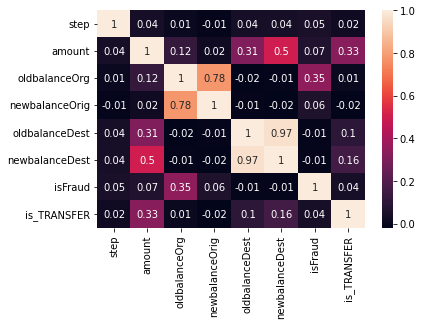

In [70]:
# Multicollinearity 
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
#PMB
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

#Multicollinearity for newbalance and oldbalance?
#I am thinking we could remove newbalance since it is already capture by the oldbalance and amount (by addition). This would remove potential collinearity too.
# theo note: I think its better to remove newBalance, that way its easier to see if oldBalance was 0 (new will just be = amount in those cases)
X_variables = df.drop(columns=['isFraud','nameOrig','nameDest'])
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,step,1.303365
1,amount,5.321682
2,oldbalanceOrg,2.783066
3,newbalanceOrig,2.631296
4,oldbalanceDest,65.281776
5,newbalanceDest,80.740306
6,is_TRANSFER,1.338878


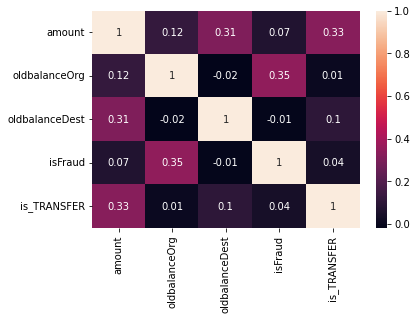

In [71]:
df = df.drop(columns=['step','newbalanceDest','newbalanceOrig','nameOrig','nameDest'])
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#expect a little collinearity between amount and newbalancedest by the nature of it being an addition
#X_variables = df.drop(columns=['isFraud','isFlaggedFraud'])
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

In [72]:
df.isnull().values.any() #clean dataset
df.isnull().sum()

amount            0
oldbalanceOrg     0
oldbalanceDest    0
isFraud           0
is_TRANSFER       0
dtype: int64

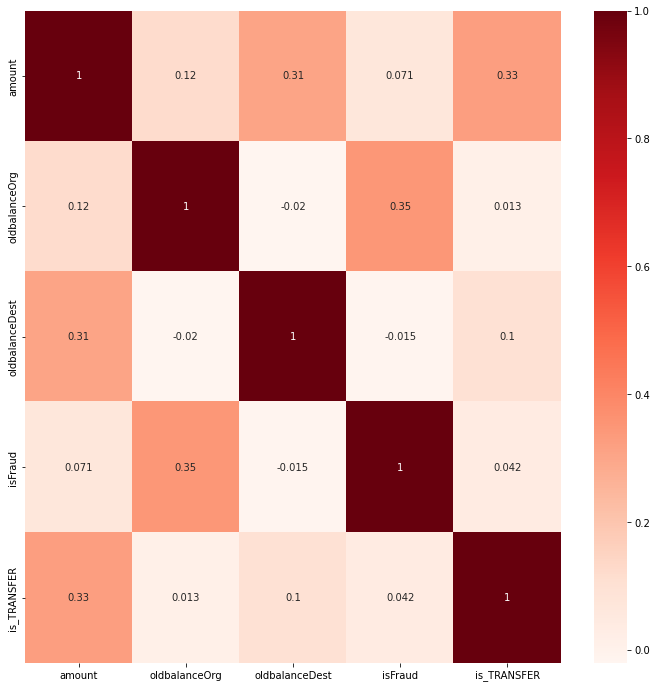

In [73]:
# !!!! THIS USES LIKE 12 GIGS OF RAM, BE CAREFUL !!!!
#df_num = pd.get_dummies(df)


plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, cmap = plt.cm.Reds)
plt.show()

In [74]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

Data representation on graph

In [75]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

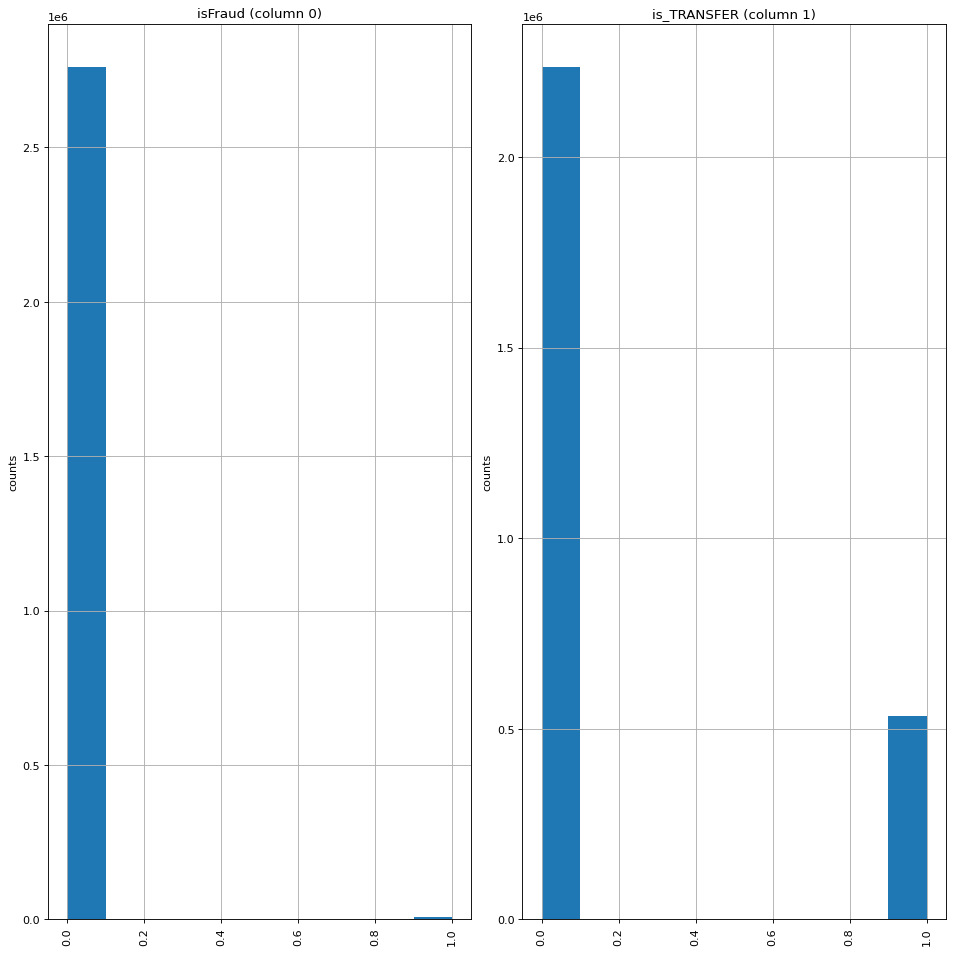

In [76]:
plotPerColumnDistribution(df, 2, 2)

To know similarity between the columns

In [22]:
from scipy.stats import pearsonr
def calculate_pvalues(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if c == r:
                df_corr = df[[r]].dropna()
            else:
                df_corr = df[[r,c]].dropna()
            pvalues[r][c] = pearsonr(df_corr[r], df_corr[c])[1]
    return pvalues

In [23]:
calculate_pvalues(df)

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,is_TRANSFER
amount,0.0,0.0,0.0,0.0,0.0,0.0
oldbalanceOrg,0.0,0.0,0.0,0.0,0.0,0.0
oldbalanceDest,0.0,0.0,0.0,0.0,0.106826,0.0
isFraud,0.0,0.0,0.0,0.0,0.0,0.0
isFlaggedFraud,0.0,0.0,0.106826,0.0,0.0,0.0
is_TRANSFER,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_copy = df.copy()
count_class_0, count_class_1 = df_copy.isFraud.value_counts()
df_copy_0 = df_copy[df_copy['isFraud'] == 0]
df_copy_1 = df_copy[df_copy['isFraud'] == 1]
df_copy_0_under = df_copy_0.sample(count_class_1)
df_under = pd.concat([df_copy_0_under, df_copy_1], axis = 0)
df_under

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,is_TRANSFER
1131271,673911.45,105833.00,4557759.43,0,0,0
4512851,332464.78,0.00,1337246.64,0,0,0
3233386,26233.61,0.00,88911.08,0,0,0
1622347,237354.68,201186.00,31224.73,0,0,0
4764445,173351.64,44197.00,82404.19,0,0,1
...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,1,0,0
6362616,6311409.28,6311409.28,0.00,1,0,1
6362617,6311409.28,6311409.28,68488.84,1,0,0
6362618,850002.52,850002.52,0.00,1,0,1


# PCA

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
#setting number of PCA comps
pcaCount = 3

In [43]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,is_TRANSFER
2,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,1
3,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,1
24,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,1


In [52]:
features = ['amount','oldbalanceOrg','oldbalanceDest']
PCA_df = df.loc[:, features].values

In [54]:
y = df.loc[:,['isFraud']].values

In [55]:
PCA_df = StandardScaler().fit_transform(PCA_df)

In [56]:
pd.DataFrame(data = PCA_df, columns = features).head()

,amount,oldbalanceOrg,oldbalanceDest
0,-0.357467,-0.188847,-0.403155
1,-0.357467,-0.188847,-0.398142
2,-0.099576,-0.128591,-0.401952
3,-0.115146,-0.186762,-0.397848
4,-0.006590,-0.146456,-0.401672


In [49]:
pca = PCA(n_components=pcaCount)

In [57]:
principalComponents = pca.fit_transform(PCA_df)

In [58]:
pcaColumns = ['pca_%i' % i for i in range(pcaCount)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = pcaColumns)

In [59]:
#reset index so values correpsond
df.reset_index(drop=True, inplace=True)
pca_df = pd.concat([principalDf, df[['isFraud']]],axis=1)
pca_df
#can clearly see when it will be fraud comparing to principle component 1 and 2

,pca_0,pca_1,pca_2,isFraud
0,-0.564977,-0.045774,0.068447,1
1,-0.561650,-0.047592,0.065168,1
2,-0.366634,0.021606,0.230497,0
3,-0.388044,-0.034736,0.233747,0
4,-0.304083,0.009105,0.300473,0
...,...,...,...,...
2770404,0.010300,1.228936,-0.054807,1
2770405,10.129256,23.650713,-2.222805,1
2770406,10.140014,23.644832,-2.233407,1
2770407,0.875026,3.145013,-0.240076,1


## Class imbalance by guessing 

In [67]:
from sklearn.metrics import f1_score, accuracy_score
df1= df
acc = accuracy_score(df1['isFraud'],pd.DataFrame(np.zeros(len(df1))))
f1 = f1_score(df1['isFraud'],pd.DataFrame(np.zeros(len(df1))))
print(f'Accuracy by creating trivial model that asssumes no fraud occurs: {acc}')
print(f'F1 by creating trivial model that asssumes no fraud occurs: {f1}')

Accuracy by creating trivial model that asssumes no fraud occurs: 0.9970354557756634
F1 by creating trivial model that asssumes no fraud occurs: 0.0


# Logistic Regression

In [ ]:
og_df = df

In [ ]:
#df = og_df

In [68]:
# HERE IS WHERE WE CHOSE IF WE WANT TO DO SOME PCA
# df = pca_df

In [69]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,is_TRANSFER
0,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,1
1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
2,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
3,1,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,1
4,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,1


### Log reg without undersampling which gives overfitted result and bad F1

In [77]:
#%%
# Helper function for evaluate prediction result. 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

def clf_evaluate(y_pred, y_test):
    '''
    The function for evaluate the model. 
    
    Parameters: 
        y_pred(np array): the prediction from classifier 
        y_test(np array): the groundtruth of label 
    
        
    '''
    confusion = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}'.format(acc, prec, rec, f1))


#%%
df.info()
df_copy = df.copy()

count_class_0, count_class_1 = df_copy.isFraud.value_counts()

df_copy_0 = df_copy[df_copy['isFraud'] == 0]
df_copy_1 = df_copy[df_copy['isFraud'] == 1]
try:
  df_copy.drop('isFlaggedFraud',axis=1,inplace=True)
except:
  pass


X_features = df_copy.drop(['isFraud'], axis = 1)
y_target = df_copy.isFraud


# Predicting using Logistic Regression classifier    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)
clf =  LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_evaluate(y_pred, y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770409 entries, 0 to 2770408
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   oldbalanceDest  float64
 3   isFraud         int64  
 4   is_TRANSFER     uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 87.2 MB
Confusion Matrix
[[548530   3909]
 [  1642      1]]
Accuracy: 0.9900, Precision: 0.0003, Recall: 0.0006, F1: 0.0004


In [78]:
y_pred = clf.predict(X_train)
clf_evaluate(y_pred, y_train)

Confusion Matrix
[[2193432   16325]
 [   6563       7]]
Accuracy: 0.9897, Precision: 0.0004, Recall: 0.0011, F1: 0.0006


## Undersampling implemented on the following log reg which balances classes

In [80]:
df.info()
df_copy = df.copy()
count_class_0, count_class_1 = df_copy.isFraud.value_counts()

df_copy_0 = df_copy[df_copy['isFraud'] == 0]
df_copy_1 = df_copy[df_copy['isFraud'] == 1]

df_copy_0_under = df_copy_0.sample(count_class_1)
df_under = pd.concat([df_copy_0_under, df_copy_1], axis = 0)

X_features = df_under.drop(['isFraud'], axis = 1)
y_target = df_under.isFraud

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)
clf =  LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_evaluate(y_pred, y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770409 entries, 0 to 2770408
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   oldbalanceDest  float64
 3   isFraud         int64  
 4   is_TRANSFER     uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 87.2 MB
Confusion Matrix
[[1458  185]
 [  66 1577]]
Accuracy: 0.9236, Precision: 0.8950, Recall: 0.9598, F1: 0.9263


In [82]:
#%%
# Helper function for evaluate prediction result. 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

def clf_evaluate(y_pred, y_test):
    '''
    The function for evaluate the model. 
    
    Parameters: 
        y_pred(np array): the prediction from classifier 
        y_test(np array): the groundtruth of label 
    
        
    '''
    confusion = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}'.format(acc, prec, rec, f1))


#%%
# Predicting using Logistic Regression classifier    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Undersampling dataset 
df.info()
df_copy = df.copy()
df_copy = df_under.copy()
#df_copy = df_pca.copy()
#df_copy = finalDf.copy()

count_class_0, count_class_1 = df_copy.isFraud.value_counts()

df_copy_0 = df_copy[df_copy['isFraud'] == 0]
df_copy_1 = df_copy[df_copy['isFraud'] == 1]

df_copy_0_under = df_copy_0.sample(count_class_1)

#df_under.drop('isFlaggedFraud',axis=1,inplace=True)
X_features = df_copy.drop(['isFraud'], axis = 1)
y_target = df_copy.isFraud

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)
clf =  LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_evaluate(y_pred, y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770409 entries, 0 to 2770408
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   oldbalanceDest  float64
 3   isFraud         int64  
 4   is_TRANSFER     uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 87.2 MB
Confusion Matrix
[[1458  185]
 [  66 1577]]
Accuracy: 0.9236, Precision: 0.8950, Recall: 0.9598, F1: 0.9263


In [83]:
import numpy as np
import statsmodels.api as sm


logit = sm.Logit(y_train, X_train).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.348807
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:                13140
Model:                          Logit   Df Residuals:                    13136
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.4968
Time:                        18:50:05   Log-Likelihood:                -4583.3
converged:                       True   LL-Null:                       -9108.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
amount         -1.015e-05   2.77e-07    -36.672      0.000   -1.07e-05    -9.6e-06
oldbalanceOrg   

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_train, np.round_(logit.predict(),0)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6570
           1       0.88      0.95      0.91      6570

    accuracy                           0.91     13140
   macro avg       0.91      0.91      0.91     13140
weighted avg       0.91      0.91      0.91     13140



In [85]:
y_pred = clf.predict(X_train)
clf_evaluate(y_pred, y_train)

Confusion Matrix
[[5786  784]
 [ 276 6294]]
Accuracy: 0.9193, Precision: 0.8892, Recall: 0.9580, F1: 0.9223


In [86]:
X_train

,amount,oldbalanceOrg,oldbalanceDest,is_TRANSFER
1227409,957432.32,957432.32,4634.35,0
2661520,33329.32,200730.00,180196.03,0
1111928,216179.15,216179.15,0.00,1
1853319,331414.90,0.00,26547159.28,1
2347805,159023.97,20116.00,1052027.84,0
...,...,...,...,...
244853,143577.39,0.00,11792147.30,0
1873710,328825.77,11720.00,537591.24,0
2582219,201404.20,12386.00,46560.44,1
2625119,369505.41,369505.41,0.00,1


In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
drop_list = []
df.info()
df_copy = df.copy()
count_class_0, count_class_1 = df_copy.isFraud.value_counts()

df_copy_0 = df_copy[df_copy['isFraud'] == 0]
df_copy_1 = df_copy[df_copy['isFraud'] == 1]
df_copy_0_under = df_copy_0.sample(count_class_1)
df_under = pd.concat([df_copy_0_under, df_copy_1], axis = 0)

X_features = df_under.drop(['isFraud'], axis = 1)
y_target = df_under.isFraud
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)

y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770409 entries, 0 to 2770408
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   oldbalanceDest  float64
 3   isFraud         int64  
 4   is_TRANSFER     uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 87.2 MB
train-set confusion matrix:
 [[6368  202]
 [2994 3576]]
test-set confusion matrix:
 [[1585   58]
 [ 716  927]]
recall score:  0.5642118076688983
precision score:  0.9411167512690355
f1 score:  0.7054794520547945
accuracy score:  0.7644552647595861
ROC AUC: 0.8725104641725034


XGBoost

In [89]:
#print XGBoost result
def presult(clf,x_test,y_test, plotimp=0):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    #print ('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print ('F1 - macro :',(f1_score(y_test,y_pred,average='macro')))
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: {0:.4f}'.format(acc))
    print  ('Confusion_matrix : ')
    print('Confusion Matrix')
    print (confusion_matrix(y_test,y_pred))
    sns.set(font_scale=1.5)
    #sns.heatmap(confusion_matrix(testY,y_pred), annot=True,annot_kws={"size": 15},fmt='10g')
    #plt.show()
    if plotimp==1:
        plot_importance(clf)
        plt.show()

### Unbalanced

In [91]:
#Using XGBoost
from xgboost import plot_importance, to_graphviz
from xgboost.sklearn import XGBClassifier

#Base metrics 
weights = (y_target == 0).sum() / (1.0 * (y_target  == 1).sum())
clf = XGBClassifier( scale_pos_weight = weights, n_jobs = 4, random_state=42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_features = df_copy.drop(['isFraud'], axis = 1)
y_target = df_copy.isFraud



X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)


clf.fit(X_train, y_train)
print ('Test')
presult(clf,X_test,y_test)

#Non PCA Acc 0.8052
#PCA Acc 0.95

Test
F1 - macro : 0.7782444198185647
Accuracy: 0.9981
Confusion_matrix : 
Confusion Matrix
[[552405     34]
 [   995    648]]


In [93]:
#creating the model
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_estimators=50) 

X_features = df_copy.drop(['isFraud'], axis = 1)
y_target = df_copy.isFraud



X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)



rf.fit(X_train, y_train) 
yPred = rf.predict(X_test) 

print ('Test')
presult(rf,X_test,y_test)


Test
F1 - macro : 0.9089260480147201
Accuracy: 0.9990
Confusion_matrix : 
Confusion Matrix
[[552342     97]
 [   438   1205]]


## Balanced - F

In [ ]:
#Using random forest
from xgboost import plot_importance, to_graphviz
from xgboost.sklearn import XGBClassifier

#Base metrics 


X_features = df_under.drop(['isFraud'], axis = 1)
y_target = df_under.isFraud



X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
#yPred = rfc.predict(X_test_scaled_pca)

print ('Test')
presult(rfc,X_test,y_test)

In [ ]:
#Using XGBoost
from xgboost import plot_importance, to_graphviz
from xgboost.sklearn import XGBClassifier

#Base metrics 
weights = (y_target == 0).sum() / (1.0 * (y_target  == 1).sum())
clf = XGBClassifier( scale_pos_weight = weights, n_jobs = 4, random_state=42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


count_class_0, count_class_1 = df_copy.isFraud.value_counts()

df_copy_0 = df_copy[df_copy['isFraud'] == 0]
df_copy_1 = df_copy[df_copy['isFraud'] == 1]

df_copy_0_under = df_copy_0.sample(count_class_1)
df_under = pd.concat([df_copy_0_under, df_copy_1], axis = 0)
#df_under.drop('isFlaggedFraud',axis=1,inplace=True)

X_features = df_under.drop(['isFraud'], axis = 1)
y_target = df_under.isFraud

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.2,
                                                    stratify = y_target,
                                                    random_state= 69)

clf.fit(X_train, y_train)
print ('Test')
presult(clf,X_test,y_test)

#Non PCA Acc 0.8052
#PCA Acc 0.95

In [ ]:
presult(clf,X_train, y_train)

In [97]:
df_under

,amount,oldbalanceOrg,oldbalanceDest,isFraud,is_TRANSFER
1566880,294173.40,0.00,895484.29,0,1
140358,303883.10,49519.00,3037.75,0,0
2427088,438829.94,0.00,9553990.68,0,1
2113867,237136.77,0.00,501090.54,0,0
1449356,282824.05,15029.00,760456.95,0,1
...,...,...,...,...,...
2770404,339682.13,339682.13,0.00,1,0
2770405,6311409.28,6311409.28,0.00,1,1
2770406,6311409.28,6311409.28,68488.84,1,0
2770407,850002.52,850002.52,0.00,1,1
